
The main purpose of this project is to experiment different money management techiniques that could `guarantee` long-term profitability.

SCENARIO:

* The experiment consists of a European roulette game (explained below) 
  * This game is an online version of European roulette where the object of the game is to successfully predict 
    which of the 37 numbered pockets the ball will land in or a characteristic of that number.
  * By correctly predicting the winning pocket or characteristic of the winning pocket, players win an amount according to the payout for the winning bet.
        
* Bets are placed in a way to give a 2:1 risk-reward ratio. Each win is twice the value of a loss.

* Roulette outcomes are assumed to random


GOAL:
* Determine the distribution of 2 wins, 1 win, and loss

* Then, we would experiment different money management techiniques that could potentially exploit this game.

### PHASE ONE : DESIGN THE ROULETTE GAME

The board has been replicated from the `board.png` file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create the board
board = [[], [], []]

for number in range(1, 37):
    index = number % 3

    board[index].append(number)

board.sort(reverse=True)
board = np.array(board)

# Assign Black or Red (0 or 1)
color = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]).astype(bool)
board

array([[ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36],
       [ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35],
       [ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34]])

In [3]:
# Model the bets
# Column represent number groups : Low (1-12), Mid (13-24), and High (25-36) numbers 
# Rows represent modulo-3 number groups : 0, 1, 2

# Simulate the guesses
row_guess = np.random.choice(np.arange(0, 3), size=2, replace=False)
col_guess = np.random.choice(np.arange(0, 3), size=2, replace=False)
row_guess, col_guess

(array([0, 1]), array([0, 2]))

In [4]:
class Bet:
    def __init__(self, row_bets, col_bets):
        if not isinstance(row_bets, list):
            row_bets = list(row_bets)

        if not isinstance(col_bets, list):
            col_bets = list(col_bets)
        
        self.row_bets = row_bets
        self.col_bets = col_bets
        self.count = len(row_bets) + len(col_bets)

    def __repr__(self) -> str:
        return f"Rows Bets : {self.row_bets}. Column Bets : {self.col_bets}"
    
    def __len__(self):
        return self.count

def compute_returns(bets:Bet, spins=1, bet_size=25, return_multiplier=2):
    # Each bet is a [1 * 2] array
    # Each result is a [1 * 2] array
    # print(f'Your Bets are : {bets}. \nTotal bets : ${bets.count * bet_size}')

    # Generate the spin results for the bets
    results = np.random.randint(0, 37, spins)
    # print(f'The spin results are {results}')

    # Generate the result coordinates
    coords = generate_result_coordinate(results)
    # print(f'Coordinates : {coords}')

    # Calculate the returns
    returns = 0 # bets.count * -bet_size

    for result in coords:
        # Row bets
        for row_bet in bets.row_bets:
            if row_bet == result[0]:
                returns += bet_size + (bet_size * return_multiplier)
            
            returns -= bet_size

        # Column bets
        for col_bet in bets.col_bets:
            if col_bet == result[1]:
                returns += bet_size + (bet_size * return_multiplier)
            
            returns -= bet_size

    return returns

def generate_result_coordinate(results): 
    """
    Compute the numbers row and column index 
    """

    # For every spin, return its row and column number
    col_result = np.floor_divide(results - 1, 12)  # Offsets for 0-based indexing 

    row_result = -1 * np.ones_like(results, dtype=np.int64)

    for i, value in enumerate(results):
        index = np.where(board == value)

        if index[0].size > 0:  # Check if any elements matched
            row_result[i] = int(index[0][0])  # Assign the first row index
        else:
            row_result[i] = -1  # Assuming -1 represents 'not found'

    coords = []

    for i in range(len(results)):
        coords.append([row_result[i], col_result[i]])

    return np.array(coords)

def random_guess():
    return np.random.choice(np.arange(0, 3), size=2, replace=False)

In [5]:
bett = Bet(random_guess(), random_guess())
compute_returns(bett)

-25

Win Rate : 43.0%


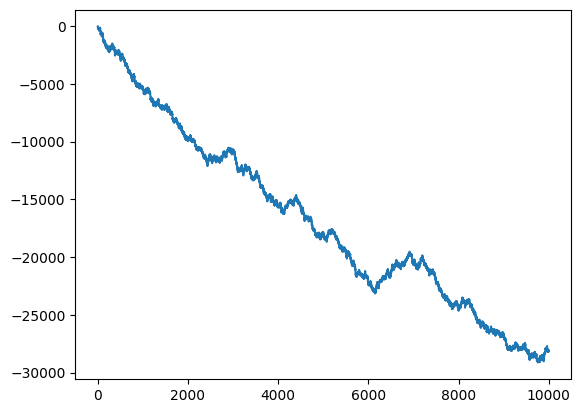

In [103]:
# Test over 10000 iterations 
rets = []
bet = Bet([0], [0])

for i in range(10000):
    # bet = Bet(random_guess(), random_guess())
    rets.append(compute_returns(bett))


rets = np.array(rets)
wins = rets[rets > 0]
loss = rets[rets == -100]

print(f"Win Rate : {round(len(wins) / len(rets), 2) * 100}%")

plt.plot(np.cumsum(rets))
plt.show()


In [59]:
np.unique(rets)

array([-100,  -25,   50])